In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os

# Parameters
batch_size = 16
image_size = (64, 64)
epochs = 5
num_images = 25000

# Paths to dataset
train_dir = '/content/drive/MyDrive/Processed_Dataset/train'
valid_dir = '/content/drive/MyDrive/Processed_Dataset/valid'

# Data Augmentation for Training and Validation Generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)

valid_datagen = ImageDataGenerator(rescale=1.0/255)

# Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
)

# Get the number of classes dynamically
num_classes = train_generator.num_classes

# Define Simplified CNN Model Architecture
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2), padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display Model Summary
model.summary()

# Steps per epoch and validation steps calculation
train_steps = min(len(train_generator), int(num_images * 0.8 / batch_size))
valid_steps = min(len(valid_generator), int(num_images * 0.2 / batch_size))

# Train Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_steps,
)

# Save Model
model.save('PlantAI_model.h5')

print("Training completed and model saved as PlantAI_model.h5")


Found 58791 images belonging to 34 classes.
Found 15779 images belonging to 34 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         460,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 34)                  │           2,210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 468,162 (1.79 MB)

 Trainable params: 468,162 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4768s 4s/step - accuracy: 0.1097 - loss: 3.2112 - val_accuracy: 0.3944 - val_loss: 2.6935
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3182s 3s/step - accuracy: 0.2915 - loss: 2.3457 - val_accuracy: 0.4185 - val_loss: 2.9525
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2078s 2s/step - accuracy: 0.3586 - loss: 2.0878 - val_accuracy: 0.5437 - val_loss: 2.5652
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1164s 927ms/step - accuracy: 0.3876 - loss: 1.9614 - val_accuracy: 0.5392 - val_loss: 2.7416
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1222s 978ms/step - accuracy: 0.4111 - loss: 1.8651 - val_accuracy: 0.5541 - val_loss: 2.9125


Training completed and model saved as PlantAI_model.h5


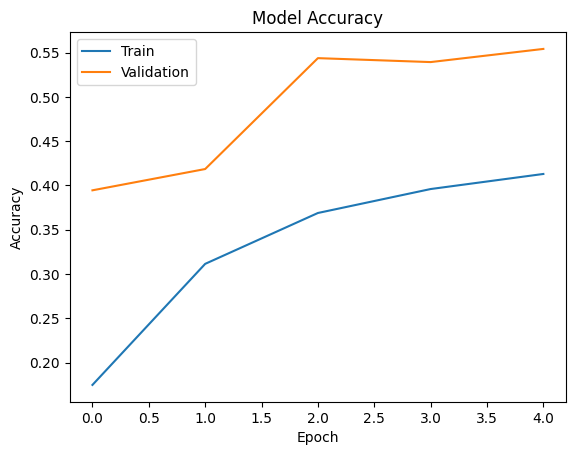

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(valid_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

987/987 ━━━━━━━━━━━━━━━━━━━━ 975s 988ms/step - accuracy: 0.5531 - loss: 2.9390
Validation Accuracy: 55.23%
